In [18]:
import nltk
from nltk.corpus import wordnet as wn
nltk.download('omw-1.4')
nltk.download('wordnet')
import numpy as np
import json

with open(os.path.join('data/ImageNet','imagenet_class_index.json'), 'rb') as f:
    imagenet_cls = json.load(f)
    imagenet_cls = [wn.synset_from_pos_and_offset(c[0][0], int(c[0][1:])) for c in imagenet_cls.values()]

[nltk_data] Downloading package omw-1.4 to /u/z/i/ziyangc/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /u/z/i/ziyangc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [118]:
# print(wn.synset_from_pos_and_offset('n', 1440764))
print([s.definition() for s in wn.synsets('miscellaneous')])

['consisting of a haphazard assortment of different kinds; ; ; ; ; ; - I.A.Richards', 'having many aspects']


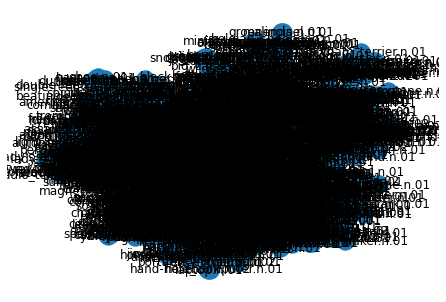

In [76]:
import networkx as nx

G = nx.Graph()
all_paths = []
for word in imagenet_cls[0:1000]:
    paths = word.hypernym_paths()
    all_paths.append(paths)

for paths in all_paths:
    for path in paths:
        for i in range(len(path) - 1):
            G.add_edge(path[i].name(), path[i+1].name())

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

# tree = []
# search_range = 3
# for i in range(np.max([len(path) for path in all_paths])):
#     nodes = {path[i] for path in all_paths if i < len(path)}
#     print(nodes)


In [41]:
from collections import OrderedDict

root = wn.synset('entity.n.01')
tree = [imagenet_cls[0:10]]
while len(tree[0]) != 1:
    lvl = OrderedDict()
    for node in tree[0]:
        if len(node.hypernyms()) > 0:
            if node == root:
                hyp = root
            else:
                hyp = node.hypernyms()[0]
            if hyp in lvl:
                lvl[hyp].append(node)
            else:
                lvl[hyp] = [node]
    tree[0] = list(lvl.values())
    tree.insert(0, list(lvl.keys()))
tree[0] = [tree[0]]
for lvl in tree:
    print(lvl)


[[Synset('entity.n.01')]]
[[Synset('physical_entity.n.01')]]
[[Synset('object.n.01')], [Synset('physical_entity.n.01')]]
[[Synset('whole.n.02')], [Synset('object.n.01')], [Synset('physical_entity.n.01')]]
[[Synset('living_thing.n.01')], [Synset('whole.n.02')], [Synset('object.n.01')]]
[[Synset('organism.n.01')], [Synset('living_thing.n.01')], [Synset('whole.n.02')]]
[[Synset('animal.n.01')], [Synset('organism.n.01')], [Synset('living_thing.n.01')], [Synset('physical_entity.n.01')]]
[[Synset('chordate.n.01')], [Synset('animal.n.01')], [Synset('organism.n.01')], [Synset('physical_entity.n.01')], [Synset('object.n.01')]]
[[Synset('vertebrate.n.01')], [Synset('chordate.n.01')], [Synset('animal.n.01')], [Synset('object.n.01')], [Synset('whole.n.02')]]
[[Synset('aquatic_vertebrate.n.01')], [Synset('vertebrate.n.01')], [Synset('chordate.n.01')], [Synset('whole.n.02')], [Synset('living_thing.n.01')]]
[[Synset('fish.n.01')], [Synset('aquatic_vertebrate.n.01')], [Synset('vertebrate.n.01')], [Syn

In [42]:
G = nx.Graph()
for i in range(len(tree)-1):
    hi = []
    for w in tree[i] hi += w
    lo = tree[i+1]
    for j, word in enumerate(hi):
        G.add_node(word.name())
        for word2 in children[j]:
            G.add_edge(word.name(), word2.name())
nx.draw()

AttributeError: 'list' object has no attribute 'name'

In [129]:
MOS_cls = ['animal.n.01', 'artifact.n.01', 'geological_formation.n.01', 'fungus.n.01', 'natural_object.n.01', 'person.n.01', 'plant.n.02']
MOS_cls = [wn.synset(c) for c in MOS_cls]
mapping = {}
for word in imagenet_cls:
    sims = [word.wup_similarity(c) for c in MOS_cls]
    i = np.argmax(sims)
    max_sim = sims[i]
    cls_name = 'misc' if max_sim < 0.4 else MOS_cls[i]
    if cls_name in mapping:
        mapping[cls_name].append(word.name())
    else:
        mapping[cls_name] = [word.name()]


for item in mapping.items():
    print(item[0], len(item[1]))
    print('samples: ', [item[1][i] for i in np.random.randint(len(item[1]), size=5)])

# G = nx.Graph()
# for item in mapping.items():
#     for child in item[1]:
#         G.add_edge(item[0].name(), child.name())

# pos = nx.spring_layout(G)
# nx.draw(G, with_labels=True)

Synset('animal.n.01') 401
samples:  ['sea_slug.n.01', 'eft.n.01', 'skunk.n.04', 'crane.n.05', 'sea_lion.n.01']
Synset('artifact.n.01') 522
samples:  ['warplane.n.01', 'lens_cap.n.01', 'plate_rack.n.01', 'shovel.n.01', 'electric_guitar.n.01']
misc 39
samples:  ['potpie.n.01', 'chocolate_sauce.n.01', 'zucchini.n.02', 'butternut_squash.n.02', 'artichoke.n.02']
Synset('natural_object.n.01') 17
samples:  ['granny_smith.n.01', 'custard_apple.n.02', 'corn.n.02', 'buckeye.n.01', 'custard_apple.n.02']
Synset('person.n.01') 3
samples:  ['eggnog.n.01', 'eggnog.n.01', 'cup.n.06', 'red_wine.n.01', 'red_wine.n.01']
Synset('geological_formation.n.01') 9
samples:  ['lakeside.n.01', 'cliff.n.01', 'cliff.n.01', 'geyser.n.01', 'promontory.n.01']
Synset('plant.n.02') 2
samples:  ["yellow_lady's_slipper.n.01", "yellow_lady's_slipper.n.01", "yellow_lady's_slipper.n.01", "yellow_lady's_slipper.n.01", "yellow_lady's_slipper.n.01"]
Synset('fungus.n.01') 7
samples:  ['agaric.n.02', 'bolete.n.01', 'earthstar.n.0

In [133]:
MOS_cls = ['animal.n.01', 'artifact.n.01', 'geological_formation.n.01', 'fungus.n.01', 'natural_object.n.01', 'person.n.01', 'plant.n.02', 'miscellaneous.a.01']
MOS_cls = [wn.synset(c) for c in MOS_cls]
mapping = {}
for word in imagenet_cls:
    sims = [word.wup_similarity(c) for c in MOS_cls]
    i = np.argmax(sims)
    cls_name = MOS_cls[i]
    if cls_name in mapping:
        mapping[cls_name].append(word.name())
    else:
        mapping[cls_name] = [word.name()]


for item in mapping.items():
    print(item[0], len(item[1]))
    print('samples: ', [item[1][i] for i in np.random.randint(len(item[1]), size=5)])

Synset('animal.n.01') 401
samples:  ['loggerhead.n.02', 'boa_constrictor.n.01', 'indian_elephant.n.01', 'shetland_sheepdog.n.01', 'dhole.n.01']
Synset('artifact.n.01') 522
samples:  ['fountain_pen.n.01', 'jinrikisha.n.01', 'beer_bottle.n.01', 'analog_clock.n.01', 'oxygen_mask.n.01']
Synset('many-sided.s.02') 3
samples:  ['bubble.n.01', 'bubble.n.01', 'traffic_light.n.01', 'traffic_light.n.01', 'street_sign.n.01']
Synset('geological_formation.n.01') 45
samples:  ['cauliflower.n.02', 'artichoke.n.02', 'coral_reef.n.01', 'hotdog.n.02', 'cucumber.n.02']
Synset('natural_object.n.01') 17
samples:  ['orange.n.01', 'jackfruit.n.02', 'banana.n.02', 'rapeseed.n.01', 'pineapple.n.02']
Synset('person.n.01') 3
samples:  ['red_wine.n.01', 'eggnog.n.01', 'eggnog.n.01', 'cup.n.06', 'red_wine.n.01']
Synset('plant.n.02') 2
samples:  ["yellow_lady's_slipper.n.01", "yellow_lady's_slipper.n.01", 'daisy.n.01', "yellow_lady's_slipper.n.01", 'daisy.n.01']
Synset('fungus.n.01') 7
samples:  ['coral_fungus.n.01'